✅ Loading energy window from ../examples/VOMnt-cpcm-tddft-1sulfur-hfx25.15_energy_window.json...
✅ Plotting orbitals from NO 65 to 95
✅ Energy range: -10.94 eV to 1.27 eV


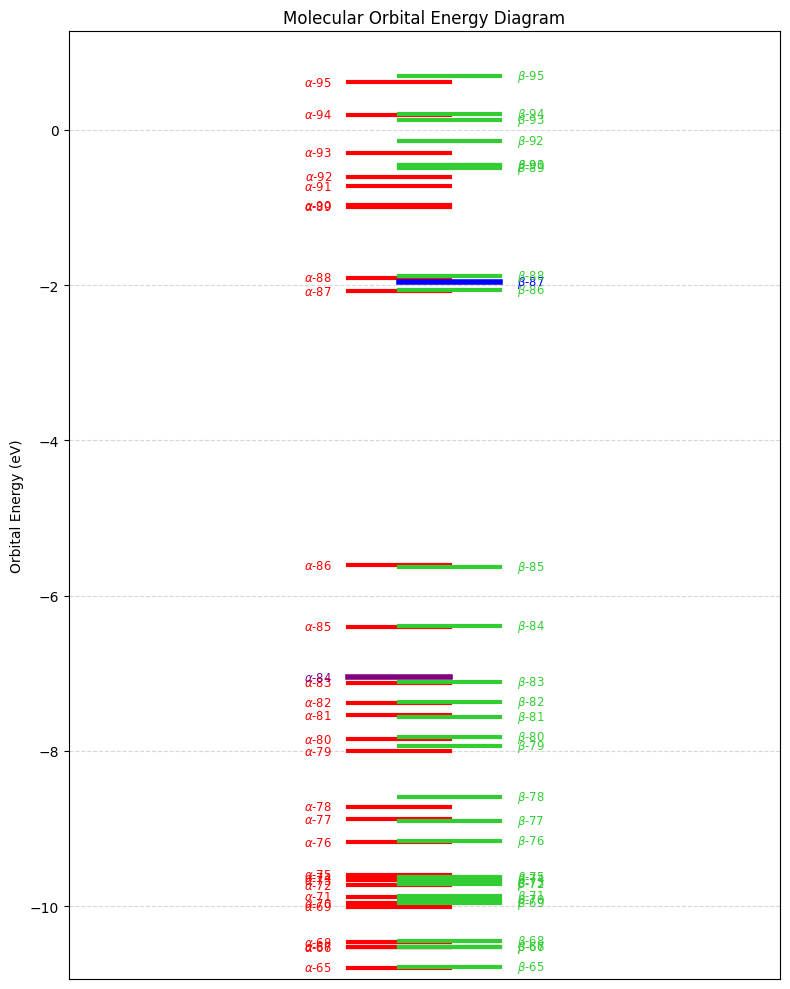

In [2]:
# =====================================
# ✅ Molecular Orbital Energy Ladder Plotter (Matplotlib Version)
# =====================================
# 📄 Description:
"""
Plot a Molecular Orbital (MO) Energy Diagram from CSV output.

This tool expects CSV files generated by 'getorbs.sh' 
(see: https://github.com/josephzsombor/cc-scripts/blob/newstart/hfx/getorbs.sh).

It creates a molecular orbital energy ladder plot:
- Alpha (α) and Beta (β) spin orbitals are plotted on opposite sides of the ladder.
- User-specified SOMOs (Singly Occupied Molecular Orbitals) can be highlighted.

Customization options include:
- Specifying the MO number range to plot.
- Optionally defining an energy window:
    - Automatically computed from MO number range
    - Manually defined by energy_min / energy_max
    - Loaded from a JSON file (created by 'orbital_energies_interactive.py'):
      https://github.com/josephzsombor/plotting-tools/blob/main/src/plottingtools/orbital_energies_interactive.py

This script is designed to be flexible for Jupyter notebooks or standalone use 
and can be modified easily for publication-quality figures.
"""

# =============================
# ✅ USER INPUT SECTION
# =============================

# Required CSV file (exported by getorbs.sh or equivalent)
csv_file = '../examples/VOMnt-cpcm-tddft-1sulfur-hfx25.15_orbital_energies.csv'

# Orbital number range to plot (inclusive)
min_orbital = 65
max_orbital = 95

# SOMO MO numbers (optional: highlight these orbitals)
alpha_somo_mo = 84   # α-SOMO (set None if not applicable)
beta_somo_mo = 87    # β-SOMO (set None if not applicable)

# ✅ Optional: Energy window JSON file (overrides manual values below)
energy_window_json = '../examples/VOMnt-cpcm-tddft-1sulfur-hfx25.15_energy_window.json'  # e.g., 'energy_window.json'

# Energy window (optional): overrides min_orbital/max_orbital energy range
# Set both to None to auto-compute from orbital ranges (unless JSON is used)
energy_min = None
energy_max = None

# Saving output? Provide filename (optional)
# Example: 'mo_diagram.svg', 'output.png', or None to skip saving
save_file = None  # e.g., 'mo_energy_diagram.svg'

# Plot settings (adjust as needed)
x_center = 1.25
overlap_half_shift = 0.125
alpha_label_offset = -0.08
beta_label_offset = 0.08

# =============================
# ✅ IMPORTS
# =============================

import pandas as pd
import matplotlib.pyplot as plt
import os
import json

# =============================
# ✅ Load and Filter Data
# =============================

df = pd.read_csv(csv_file)

# ✅ Filter by spin and MO number ranges
alpha_df = df[(df["Spin"] == 0) & (df["NO"] >= min_orbital) & (df["NO"] <= max_orbital)].copy()
beta_df  = df[(df["Spin"] == 1) & (df["NO"] >= min_orbital) & (df["NO"] <= max_orbital)].copy()

# =============================
# ✅ Determine Energy Window
# =============================

# Priority 1: JSON file (overrides everything)
if energy_window_json and os.path.isfile(energy_window_json):
    print(f"✅ Loading energy window from {energy_window_json}...")
    with open(energy_window_json, 'r') as f:
        window = json.load(f)
        energy_min = window.get("energy_min", energy_min)
        energy_max = window.get("energy_max", energy_max)

# Priority 2: Auto-compute from orbital energy ranges if still None
if energy_min is None:
    energy_min = min(alpha_df["E(eV)"].min(), beta_df["E(eV)"].min())

if energy_max is None:
    energy_max = max(alpha_df["E(eV)"].max(), beta_df["E(eV)"].max())

print(f"✅ Plotting orbitals from NO {min_orbital} to {max_orbital}")
print(f"✅ Energy range: {energy_min:.2f} eV to {energy_max:.2f} eV")

# =============================
# ✅ Create Matplotlib Plot
# =============================

fig, ax = plt.subplots(figsize=(8, 10))  # Customize figure size here

# ✅ Plot α Spin Orbitals (Left)
for _, row in alpha_df.iterrows():
    color = "red" if (alpha_somo_mo is None or row["NO"] != alpha_somo_mo) else "purple"
    linewidth = 3 if (alpha_somo_mo is None or row["NO"] != alpha_somo_mo) else 4
    
    # Horizontal line
    ax.plot(
        [x_center - 0.5 + overlap_half_shift, x_center + overlap_half_shift],
        [row["E(eV)"], row["E(eV)"]],
        color=color,
        linewidth=linewidth
    )
    
    # MO label
    ax.text(
        x_center - 0.5 + overlap_half_shift + alpha_label_offset,
        row["E(eV)"],
        f"$\\alpha$-{int(row['NO'])}",
        ha='right',
        va='center',
        fontsize='small',
        color=color
    )

# ✅ Plot β Spin Orbitals (Right)
for _, row in beta_df.iterrows():
    color = "limegreen" if (beta_somo_mo is None or row["NO"] != beta_somo_mo) else "blue"
    linewidth = 3 if (beta_somo_mo is None or row["NO"] != beta_somo_mo) else 4
    
    # Horizontal line
    ax.plot(
        [x_center - overlap_half_shift, x_center + 0.5 - overlap_half_shift],
        [row["E(eV)"], row["E(eV)"]],
        color=color,
        linewidth=linewidth
    )
    
    # MO label
    ax.text(
        x_center + 0.5 - overlap_half_shift + beta_label_offset,
        row["E(eV)"],
        f"$\\beta$-{int(row['NO'])}",
        ha='left',
        va='center',
        fontsize='small',
        color=color
    )

# =============================
# ✅ Customize Plot Appearance
# =============================

ax.set_ylim(energy_min, energy_max)
ax.set_xlim(-0.5, 3.0)  # Adjust this for white space on sides

ax.set_xlabel('')
ax.set_ylabel('Orbital Energy (eV)')
ax.set_title('Molecular Orbital Energy Diagram')

# ✅ Hide x-axis ticks (since they are not relevant)
ax.set_xticks([])

# ✅ Grid and layout tweaks
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# =============================
# ✅ Save and Show
# =============================

if save_file:
    ext = os.path.splitext(save_file)[1].lower()
    if ext not in ['.png', '.svg', '.pdf']:
        print("❌ Unsupported file format! Use .png, .svg, or .pdf.")
    else:
        plt.savefig(save_file)
        print(f"✅ Plot saved as {save_file}")

plt.show()
